# Neutron Slowing Down and Resonance Absorption
In this notebook, we will examine the Narrow Resonance (NR) and Wide Resonance (WR) approximations which we learned about in class. For this exercise, we will consider U238 at room temperature. This notebook will generate an interactive plot where you can explore the NR and WR approximations for the flux, and compare them to an exact numerical solution to the slowing down equation. You can zoom in on different energy intervals, and look at the effects of changing the dilution cross section.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
from scarabee import FluxCalculator

Here, we load in the U238 cross section data from a binary Numpy file. These cross sections are for room temperature (293.6K).

In [2]:
U238_data = np.load("U238_xs_data.npy")
energy = U238_data[0,:]
sigma_t = U238_data[1,:]
sigma_s = U238_data[2,:]
sigma_a = U238_data[3,:]

# Potential scattering xs for U238 from Scarabée
sigma_p = 11.293447536607045
AWR_U238 = 236.0057

energy_exact_bounds = np.geomspace(1.E-5, 20.E6, 400000)
energy_exact = 0.5*(energy_exact_bounds[1:] + energy_exact_bounds[:-1])
sigma_t_exact = np.interp(energy_exact, energy, sigma_t)
sigma_s_exact = np.interp(energy_exact, energy, sigma_s)

We can now create functions which apply the Narrow Resonance (NR) and Wide Resonance (WR) approximations:

In [3]:
# Narrow Resonance approximation
def nr_flux(sigma_0):
    return (1. / energy) * ((sigma_p + sigma_0)/(sigma_t + sigma_0))

# Wide Resonance approximation
def wr_flux(sigma_0):
    return (1. / energy) * ((sigma_0)/(sigma_a + sigma_0))

def exact_flux(sigma_0):
    calc = FluxCalculator(energy_exact_bounds, sigma_t_exact, sigma_s_exact, AWR_U238)
    calc.add_background_nuclide(sigma_0, 1.)
    calc.solve()
    return calc.avg_energy, calc.flux

We can now plot these two flux approximations as a function of the dilution, $\sigma_0$.

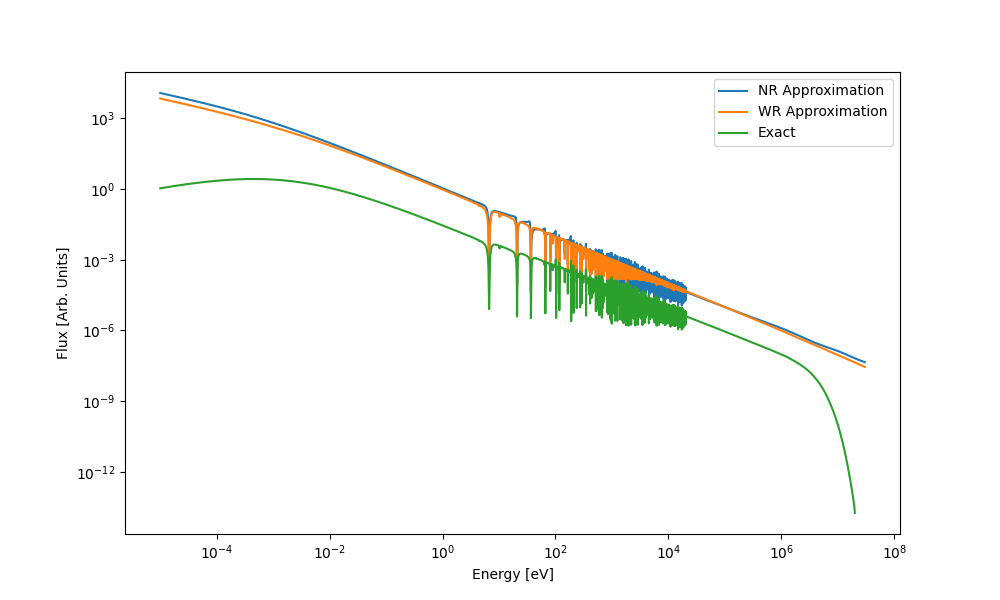

interactive(children=(FloatLogSlider(value=10.0, description='$\\sigma_0$', layout=Layout(width='80%'), max=10…

In [4]:
nr_flx = nr_flux(10.)
wr_flx = wr_flux(10.)
exact_energy, exact_flx = exact_flux(10.)

%matplotlib widget
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
nr_line, = ax.plot(energy, nr_flx, label="NR Approximation")
wr_line, = ax.plot(energy, wr_flx, label="WR Approximation")
exact_line, = ax.plot(exact_energy, exact_flx, label="Exact")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy [eV]')
ax.set_ylabel('Flux [Arb. Units]')
ax.legend().set_draggable(True)
plt.show()

dilution_slider = widgets.FloatLogSlider(value=10., base=10., min=-3., max=10., step=0.01,
                                         description=r'$\sigma_0$', layout=widgets.Layout(width='80%'))
exact_norm_slider = widgets.FloatLogSlider(value=10., base=10., min=-3., max=10., step=0.01,
                                           description='Exact Flux Normalization',
                                           layout=widgets.Layout(width='80%'),
                                           style={'description_width': '15%'})

def update_flux(sigma_0, N):
    _, exact_flx = exact_flux(sigma_0)
    nr_line.set_ydata(nr_flux(sigma_0))
    wr_line.set_ydata(wr_flux(sigma_0))
    exact_line.set_ydata(exact_flx*N)

_ = widgets.interact(update_flux, sigma_0=dilution_slider, N=exact_norm_slider)

# Questions

1) Examine the lowest lying resonance of U238, located near 6.67 eV, using a value of $\sigma_0$ between 7 and 10 barns. Adjust the "Exact Flux Normalization" slider to move the exact solution up and down to compare agains the NR and WR approximations. Does the NR or WR flux better approximate the exact flux spectrum ?

2) Examine the resonances in the vicinity of 7.8 keV (no need to be exact, any energy interval near this point should work), using a dilution of $\sigma_0=1$ barn. Does the NR or WR flux better approximate the exact flux spectrum ?

3) Examine the resonance located at 190 eV using a dilution of $\sigma_0=100$ barns. Do either the NR or WR fluxes do a good job of approximating the exact flux ?

4) If you had to choose between the NR and WR approximations for treating U238, which would be the best choice, considering their performance across the entire *resolved resonance region* ?